<h1 style="font-size:3rem;color:blue;">ECE 174 Mini Project 1: Least Squares Based Supervised Classification</h1>
<h2 style="font-size:1;color:blue;">BY: JAY PAEK</h2>

# Preparation

## Required Libraries

* scipy
* numpy
* matplotlib

In [232]:
!pip3 install scipy
!pip3 install numpy
!pip3 install matplotlib


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: /usr/local/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: /usr/local/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: /usr/local/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip


## Importing datasets and libraries

Import required libraries and MNIST dataset<br>
Let 'in' be the input values, which are 28x28 images that are stretched to be 784x1 arrays<br>
Let 'expected' be the true number represented by the image
Make each input dataset consist of floating point values where each pixel has a greater weight if the pixel is brighter. Divide all values by 255, the maximum pixel value.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import dot, matmul
from numpy.linalg import inv as inverse, det
from scipy.io import loadmat
training_data = loadmat('mnist.mat')

Set up each data set

In [152]:
# these will be used for later
test_in_pure = training_data['testX'] / 255
train_in_pure = training_data['trainX'] / 255

# all inputs
test_in = test_in_pure / 255
test_in_aug = np.hstack((np.ones((test_in.shape[0], 1)), test_in))
test_expected = training_data['testY']
train_in = train_in_pure / 255
train_in_aug = np.hstack((np.ones((train_in.shape[0], 1)), train_in))
train_expected = training_data['trainY']

## Important Functions and Other Setup



In order to visualize the entries in the test data 'test_in,' the 'visualize' function will plot the data.

In [153]:
def make_red(arr):
  red = []
  for i in range(len(arr)):
    row = []
    for j in range(len(arr)):
      row.append((arr[i][j], 0, 0))
    red.append(row)
  return red

def visualize(arr, index):
  number = arr[index, 0:].reshape((28,28)).tolist()
  img = make_red(number)
  fig, visual = plt.subplots(1,1)
  pic = visual.table(cellColours=img, loc='center')
  visual.axis('off')

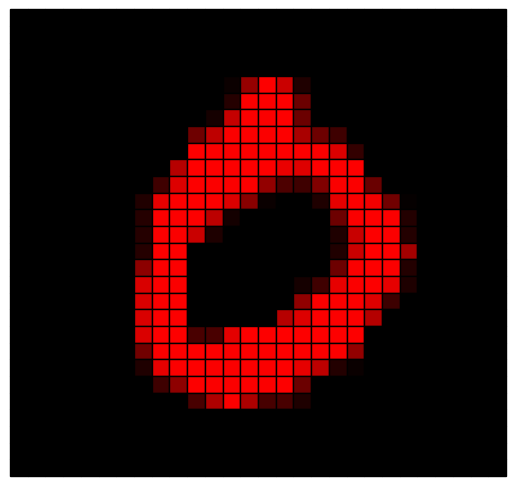

In [154]:
visualize(test_in_pure, 3)

This function below will convert the output / results into either -1 or 1 such that it either matches or does not match the desired output, respectively.

In [155]:
def match_convert_bin(arr, match):
  return np.where(arr==match,1,-1).T

* In this first part, I will be building a binary classifier that classifies whether a given 28x28 image is an image of the number '4' or not.<br>
* Let 'results' be a 10000x1 array where the ith row value is the predicted output of the binary least square classifier approximation for ith image/array from 'train_in.'<br>
* For the binary classifier, we will convert 'train_expected' to an ndarray with identical dimensions, where each value is changed to either '1' or '-1' to determine if the provided image represents a '4' or not. We will call this new array: 'binary_expected.'<br>
Make sure these arrays are column vectors.

In [156]:
train_expected_bin = match_convert_bin(train_expected, 4)

Now that we have our binary dataset prepared, we can proceed to calculate the regression vector for the dataset.<br>
<br>
$$
(A^{T}A)^{-1}A^{T}b
$$
<br>
where A is the training dataset 'train_in' and b is the expected outputs of the regression.
Note that A will be a 60000x784 dimension ndarray. Therefore, the transpose of A will be 784x60000.
Hence, the resulting vector with the prediction weights will be 784x1.<br>



In [157]:
def make_weights(input, expected):
  return dot(np.linalg.pinv(input), expected)

Recall that we can only calculate this matrix only when the column vectors in A are linearly independent (from section 11.5 from the textbook). 
This is because the product of transpose A and A is only invertible when all vectors in the product are linearly independent. If there are linearly dependent rows/columns in A, then the transpose of A will have linearly independent columns/rows, and ultimately, their product will have linearly dependent column vectors. <br>
Let us call this  product vector 'prediction_weights'<br>
We can only find the inverse of A<sup>T</sup>A when it is invertible. Let's calculate the determinant...

Define a function that calculates the least square error in the dataset. We want the raw decimal values of 'prediction_results' to be close to 'expected_results_bin' as much as possible.


In [158]:
def calculate_err(predictions, expected):
  return np.sum(np.square(np.subtract(expected, predictions)))

Define a function that will discretize the output prediction vector into 1 or -1.

In [159]:
def sign(arr):
  return np.where(arr>=0,1,-1)

This function will compare the predicated and expected values for a one versus one classifier.

In [160]:
def analyze(err=False):
    # this is ONLY for the binary classifier
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    # iterate through rows
    num_cols = len(prediction_results_bin)
    for index in range(num_cols):
        if prediction_results_bin[index] == 1:
            if expected_results_bin[index] == 1:
                true_positive = true_positive + 1
            else:
                false_positive = false_positive + 1
        else:
            if expected_results_bin[index] == 1:
                false_negative = false_negative + 1
            else:
                true_negative = true_negative + 1
              
  
    fig, (confusion, rates) = plt.subplots(2,1)
    gtotal = true_positive + false_negative + false_positive + true_negative
    expected_false = expected_results_bin.count(-1)
    expected_true = expected_results_bin.count(1)

    results= [
      ["Outcome", "Prediction = 1", "Prediction = -1", "Total"],
      ["Expected = 1", true_positive, false_negative, true_positive + false_negative],
      ["Expected = -1", false_positive, true_negative, false_positive + true_negative],
      ["Total", true_positive + false_positive, false_negative + true_negative, gtotal],
    ]


    err_rate = (false_positive + false_negative) / len(prediction_results_bin)

    if err:
        return err_rate
    
    tp_rate = true_positive / expected_true
    fp_rate = false_positive / expected_false
    tn_rate = true_negative / expected_false
    precision = true_positive / (true_positive + false_positive)
    rates_data = [
      ["Error Rate", err_rate],
      ["True Positive Rate", tp_rate],
      ["False Positive Rate", fp_rate],
      ["True Negative Rate", tn_rate],
      ["Precision", precision]
    ]


    table1 = confusion.table(cellText=results, loc='center')
    table1.set_fontsize(100)
    table1.scale(1,2)
    confusion.set_title("Confusion Matrix")

    table2 = rates.table(cellText=rates_data, loc='center', cellLoc='center')
    table2.set_fontsize(50)
    table2.scale(1,1.5)
    rates.set_title("Testing Error Rates")

    confusion.axis('off')
    rates.axis('off')
    plt.show()

This function below will compare the predicted value and the expected values.

In [161]:
def analyze_multi(predicted, expected, rate=False):
    matrix = [[0] * 10 for _ in range(10)]

    for i in range(len(predicted)):
        matrix[expected[i]][predicted[i]] = matrix[expected[i]][predicted[i]] + 1

    accurate = sum(matrix[i][i] for i in range(10))

    matrix = [row + [sum(row)] for row in matrix]

    totals = []
    for col in range(len(matrix[0])):
        total = 0
        for row in range(len(matrix)):
            total = total + matrix[row][col]
        totals.append(total)

    matrix.append(totals)


    precision = []
    for i in range(10):
        row = matrix[i]
        total = 0
        for j in range(10):
            if i != j:
                total = total + row[j]
        precision.append(["Accuracy for " + str(i), 1 - total/row[10]])

    for row in range(10):
        matrix[row] = [row] + matrix[row]

    matrix[10] = ["totals"] + matrix[10]

    matrix = [["Predicted\n--->", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "Totals"]] + matrix
    err = [["Error Rate", 1-accurate/len(predicted)]] + precision
    
    if rate:
        return 1-accurate/len(predicted)

    fig, (confusion, err_rate) = plt.subplots(2,1)

    display1 = confusion.table(cellText=matrix, loc='center', cellLoc='center')
    display1.scale(2,2)
    display1.auto_set_font_size(False)
    display1.set_fontsize(10)
    
    confusion.axis('off')


    display2 = err_rate.table(cellText=err, loc='bottom', cellLoc='center')
    display2.scale(2,3)
    display2.auto_set_font_size(False)
    display2.set_fontsize(15)
    
    err_rate.axis('off')

    plt.show()

# Binary Classifier

In [12]:
prediction_weights = make_weights(train_in_aug, train_expected_bin)

First test on the training data. <br>
Use the sign function to make values more discrete.<br>
While we're at it, make the test expected results to be 1/-1. <br>
Just for convenience, make both 60000x1 column vectors into a list with one row.

In [13]:
prediction_results = dot(train_in_aug, prediction_weights)
prediction_results_bin = sign(prediction_results).T.tolist()[0]
expected_results_bin = match_convert_bin(train_expected, 4).T.tolist()[0]

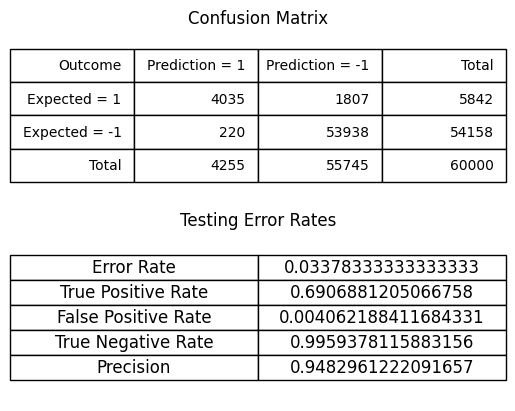

In [14]:
analyze()

We can now use prediction weights on the testing dataset. Let 'prediction_results' hold the True/False (or 1/-1) values from our predictions. Since 'test_in' is 10000x668, multiplying it to the prediction vector (668x1), the product will be 10000x1 while holds the output values for the ith row input of 'test_in.'

In [15]:
prediction_results = dot(test_in_aug, prediction_weights)
prediction_results_bin = sign(prediction_results).T.tolist()[0]
expected_results_bin = match_convert_bin(test_expected, 4).T.tolist()[0]

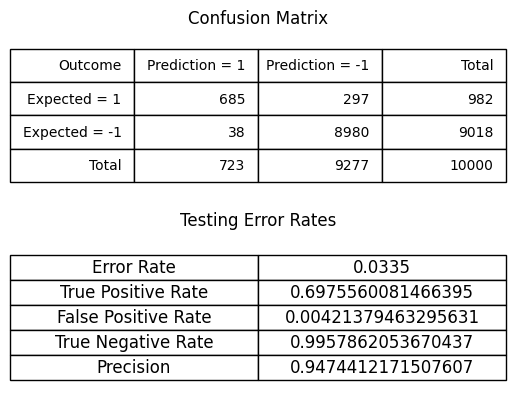

In [16]:
analyze()

Not too bad for a binary classifier.

# One Versus All Classifier

I will now build a One Versus All Classifier. This classifier creates K binary classifiers of one versus evey other value. I will select 0 as the base case, then our K binary classifiers will be comparing:


*   Either 0 or not 0
*   Either 1 or not 1
*   Either 2 or not 2
*   Either 3 or not 3
*   Either 4 or not 4
*   Either 5 or not 5
*   Either 6 or not 6
*   Either 7 or not 7
*   Either 8 or not 8
*   Either 9 or not 9

For each case, there will be a vector of weights. Let B be a set of column vectors where each vector is the weights for each binary classifier. <br>
We want to implement a bias for each and every weight vector. In order to do so, add an additional column to 'train_in' with all 1's. And then, let the first element of each weight vector be the bias. <br>

$$ 
Let\ A \in \mathbb{R}^{m\times{n}} \; and\ \\
Let\ w\ be\ the\ weights\ where\ column\ i\ is\ to\ classify\ "i"\ then: \\
 A = \begin{bmatrix}  & a_1 \\ & a_2 \\ \textbf{1}  & . \\ & . \\ & a_n \end{bmatrix} \quad 
  s.t \quad a_1,\ a_2,\ ...\ ,\ a_n \in \mathbb{R}^{1\times {n}}\\ 
w = \begin{bmatrix} b_0 & b_1 & ... & b_9 \\
                      w_0 & w_1 & ... & w_9\end{bmatrix} \quad 
                      s.t\quad w_0,\ w_1,\ ...\ ,\ w_9\in \mathbb{R}^{n},\\
\qquad \qquad \qquad \qquad \qquad \qquad \qquad
b_0,\ b_1,\ ...\ ,\ b_9 \in \mathbb{R}^{n}
$$

$\therefore Aw\ = \ \begin{bmatrix} b_0\ +\ w_0a_1 & b_1\ +\ w_1a_1\ & ... & b_9\ +  w_9a_1  \\ b_0\ +\ w_0a_2 & b_1\ +\ w_1a_2\ & ... & b_9\ +  w_9a_2 \\ & .\\ & .\\ b_0\ +\ w_0a_n & b_1\ +\ w_1a_n\ & ... & b_9\ +  w_9a_n   \end{bmatrix}$ 

We can see from the matrix multiplication that the ith row has the row vector of 'a' multiplied by a binary classifier and bias for a certain digit. <br>
We can find the maximum of each row and converge the matrix into the index of the maximum value in order to create the prediction for the drawn number.

Initialize an empty array with the row length from the columns of train_in and the bias vector.

Begin to find w where w is the augment of a binary classifier for each number.

In [71]:
def make_one_all(input, expected):
    one_all_weights = np.empty((input.shape[1], 0))
    for match in range(0, 10): 
        train_expected_bin = match_convert_bin(expected, match)
        prediction_weights = make_weights(input, train_expected_bin)

        # concatentate bias to weights, then bias and weights to the one against all classifier.
        one_all_weights = np.concatenate((one_all_weights, prediction_weights), axis=1)
    return one_all_weights

In [72]:
prediction_weights = make_one_all(train_in_aug, train_expected)

Test on training data

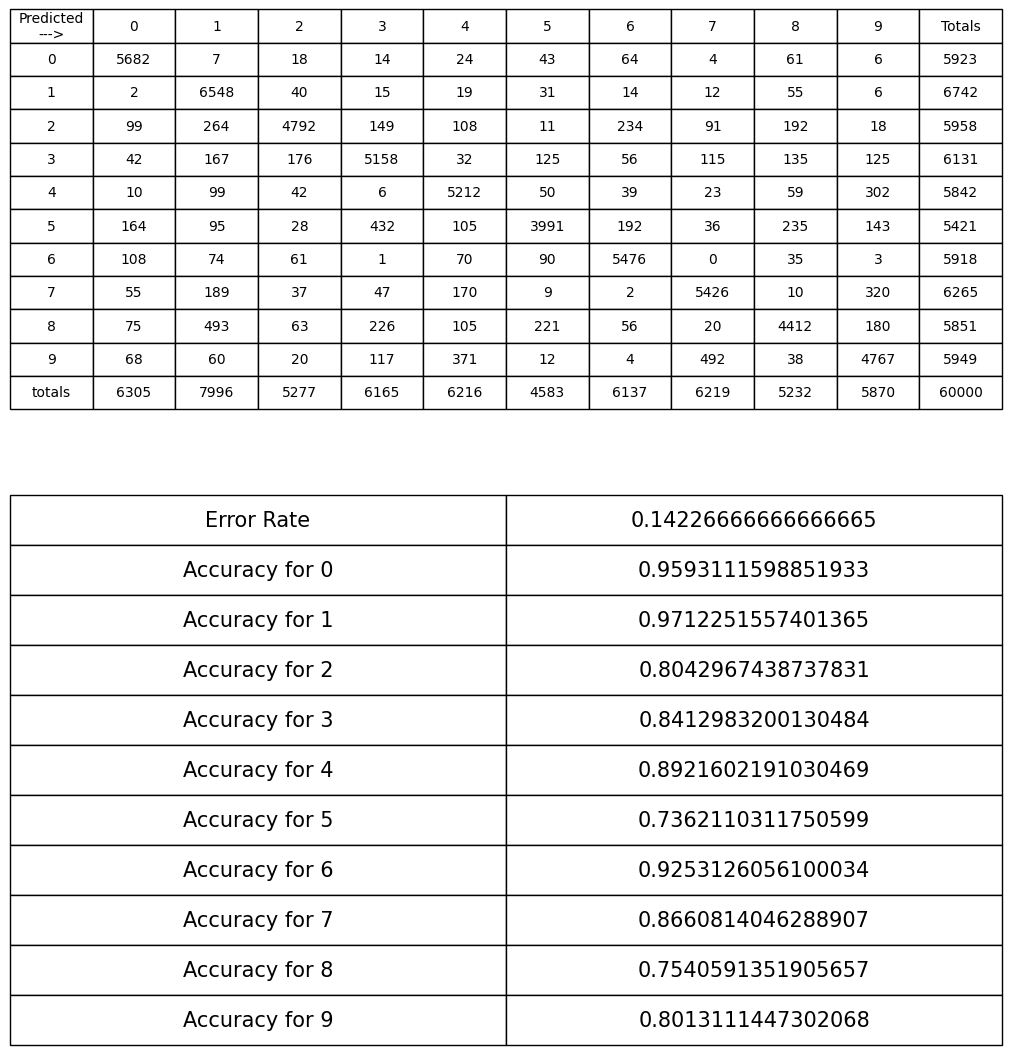

In [73]:
prediction_results = np.argmax(dot(train_in_aug, prediction_weights),axis=1)
analyze_multi(prediction_results, train_expected[0])

Test on testing data

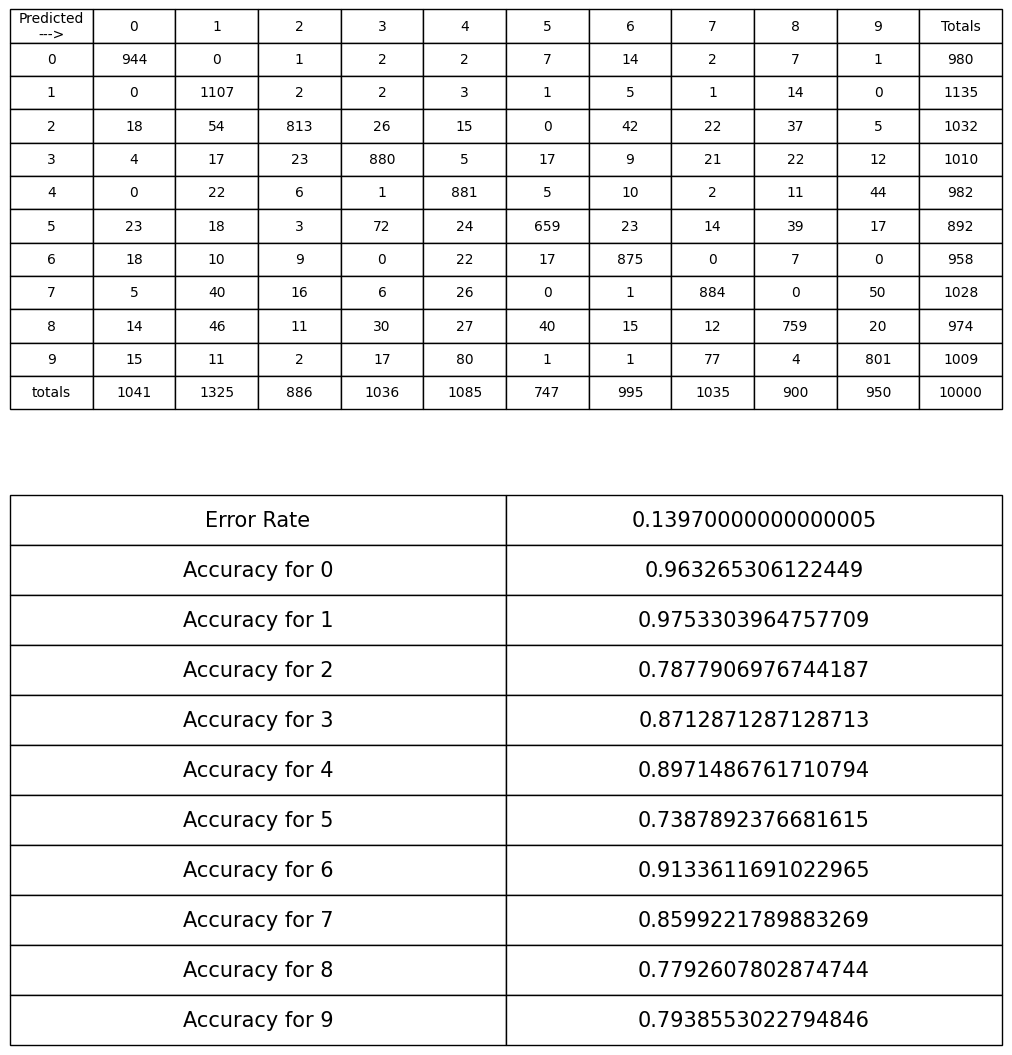

In [19]:
prediction_results = np.argmax(dot(test_in_aug, prediction_weights),axis=1)
analyze_multi(prediction_results, test_expected[0])

# One Versus One Classifier

For the One Versus One classifier, for a certain number i, there are 9 possibilities. Either the value is i, or it is another specific number. <br>
Let A be a matrix that compareds i to 1 and let B be a matrix such that the matrix i

In [74]:
def filter(arr, i, j):
    match_i = arr == i
    match_j = arr == j
    match = match_i + match_j
    return match

In order to find the weights for each pairwuse classifier, we need to make every single pairwise dataset for i,j linearly independent. <br>
find all pixels that are activated by every single pair.

In [101]:
pairs = []
for i in range(10):
    for j in range(i + 1, 10):
        pairs.append([i, j])

def make_one_one(input, expected):
    one_one_weights = np.empty((input.shape[1],0))
    for i in range(10):
        for j in range(i + 1, 10):
            # choose i and j images in training data set
            selected = filter(expected, i, j)
            train_in_selected = input[selected]
            train_expected_selected = match_convert_bin(expected[selected], i)

            prediction_weights = make_weights(train_in_selected, train_expected_selected)

            one_one_weights = np.column_stack((one_one_weights, prediction_weights))
    return one_one_weights

In [77]:
prediction_weights = make_one_one(train_in_aug, train_expected[0])

The functions below will collapse the 45 columns into 1 column by using a voting algorithm

In [78]:
def count_votes(arr):
    # counts votes
    vals = [0] * 10
    for i in range(len(arr)):
        index = pairs[i][min(0, arr[i])]
        vals[index] += 1
    vals.index(max(vals))
    return vals.index(max(vals))

def collapse_results(arr):
    results = []
    for row in range(len(arr)):
        results.append(count_votes(arr[row]))
    return np.array(results)

Test on training data

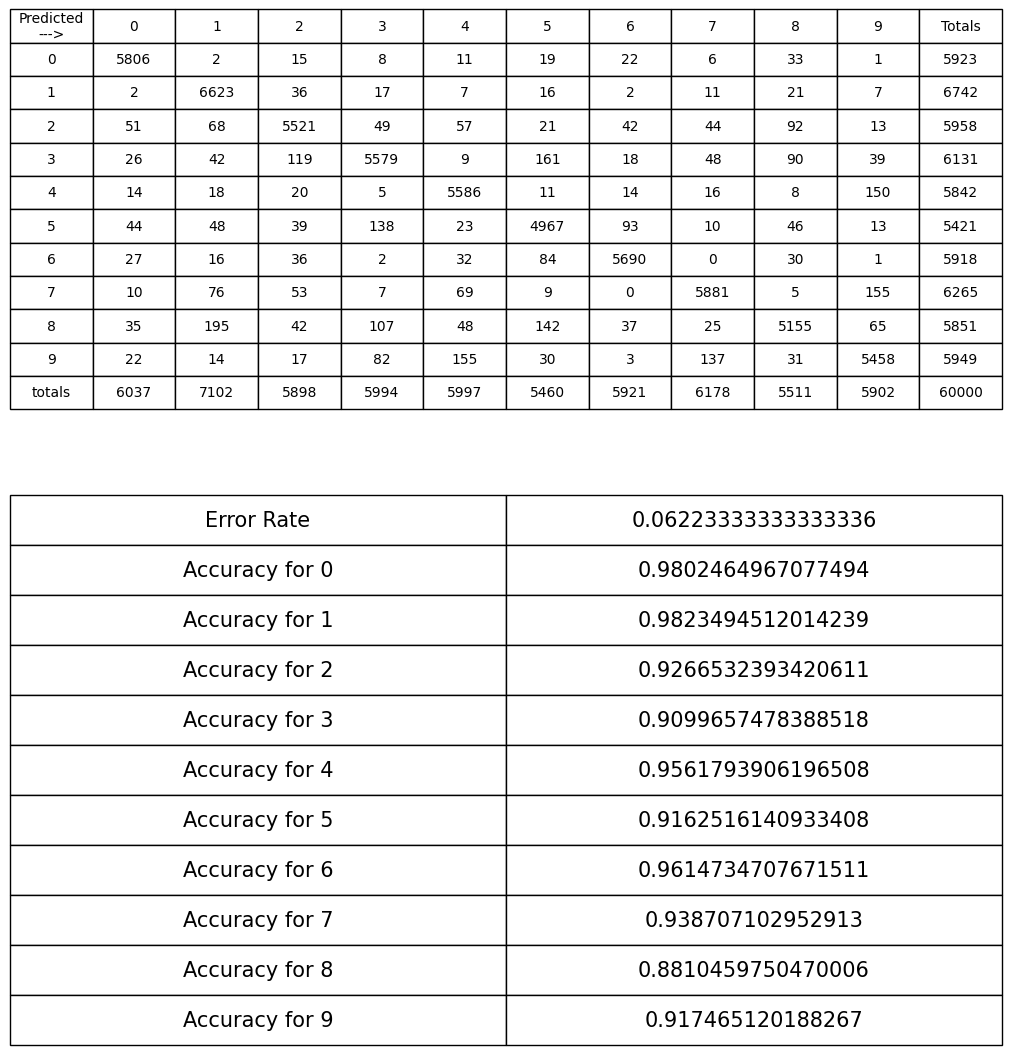

In [79]:
prediction_results = collapse_results(sign(dot(train_in_aug, prediction_weights)))
analyze_multi(prediction_results, train_expected[0])

Test on testing data

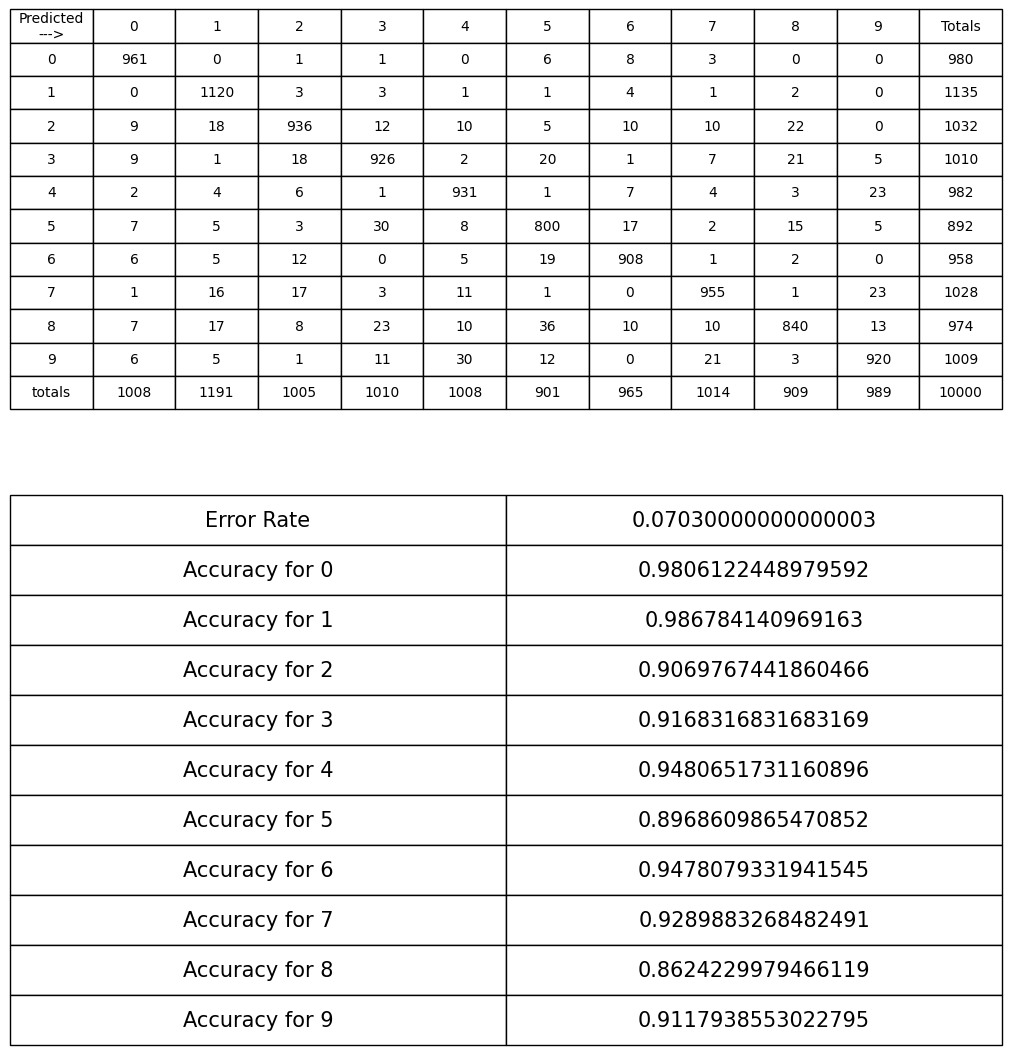

In [25]:
prediction_results = collapse_results(sign(dot(test_in_aug, prediction_weights)))
analyze_multi(prediction_results, test_expected[0])

# Randomized

## Set Up

Create a 784x1000 matrix that will convert the data matrix into a 1000 column matrix, then add addition Gaussian random biases b

In [26]:
randomizer = np.random.normal(0,1,(train_in.shape[1], 1000))
biases = np.random.normal(0,1,(1, 1000))

Transform the input matrices with the randomized features.

In [27]:
train_in_rand = matmul(train_in, randomizer) + biases
test_in_rand = matmul(test_in, randomizer) + biases

## g(x) = x

Apply one vectors after applying feature function (nothing).

In [28]:
train_in_feature = np.hstack((np.ones((train_in_rand.shape[0], 1)), train_in_rand))
test_in_feature = np.hstack((np.ones((test_in_rand.shape[0], 1)), test_in_rand))

One versus All classifier

In [29]:
prediction_weights = make_one_all(train_in_feature, train_expected)

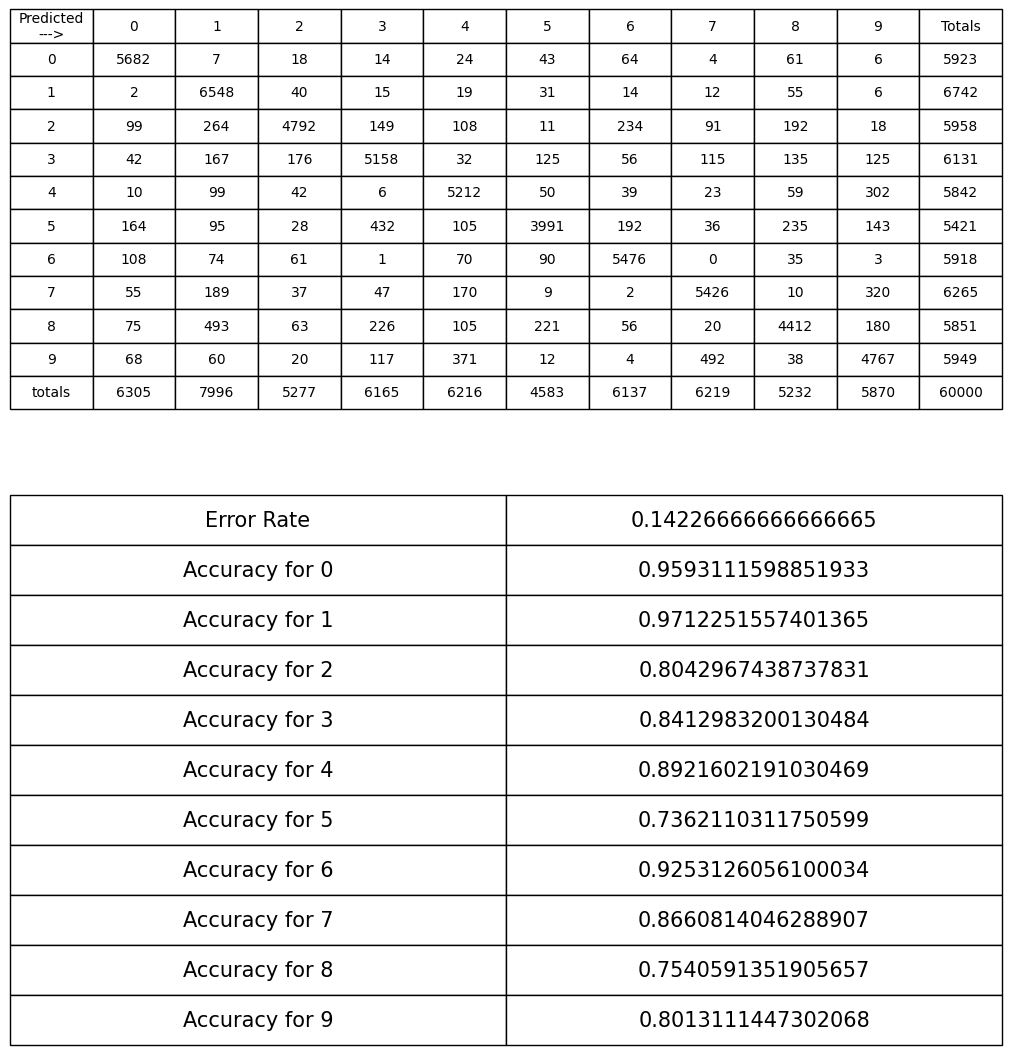

In [38]:
prediction_results = np.argmax(dot(train_in_feature, prediction_weights),axis=1)
analyze_multi(prediction_results, train_expected[0])

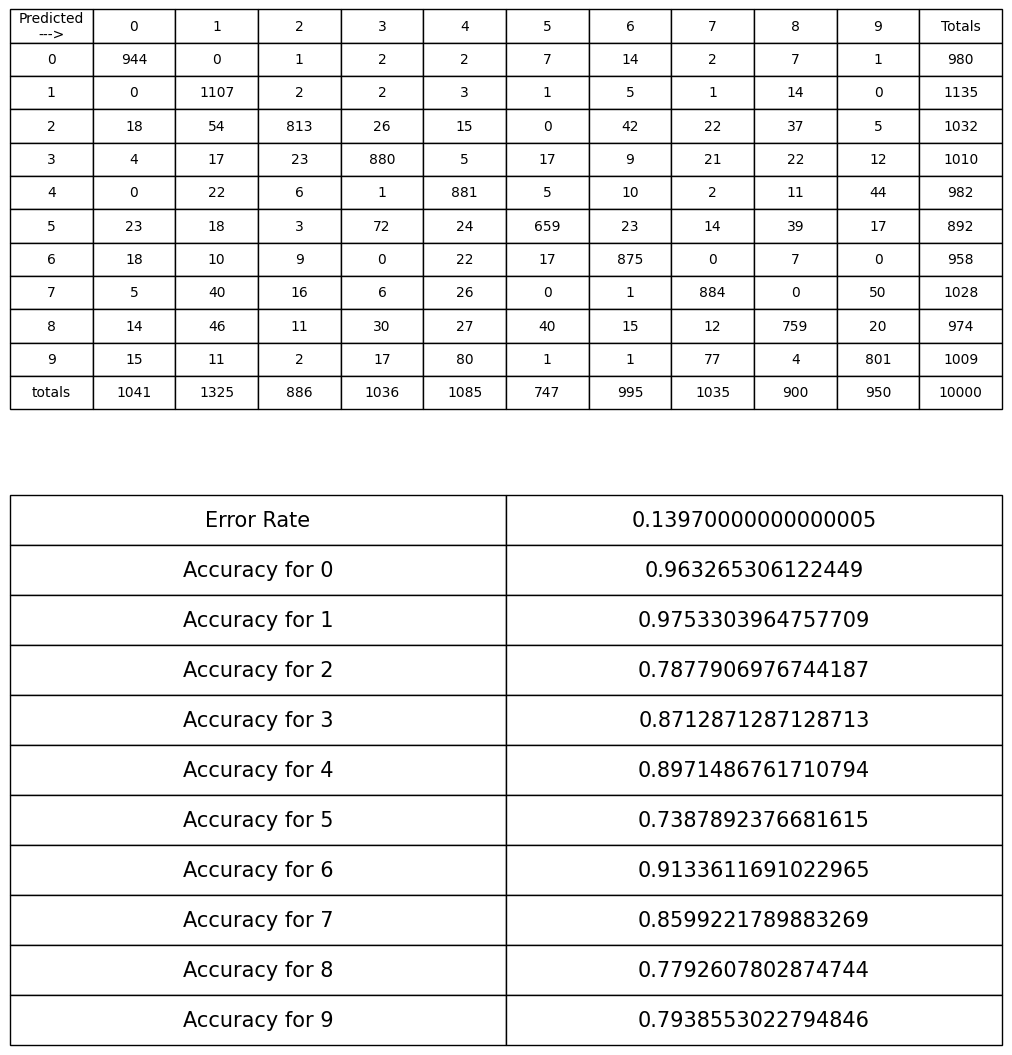

In [39]:
prediction_results = np.argmax(dot(test_in_feature, prediction_weights),axis=1)
analyze_multi(prediction_results, test_expected[0])

One versus One classifier

In [41]:
prediction_weights = make_one_one(train_in_feature, train_expected[0])

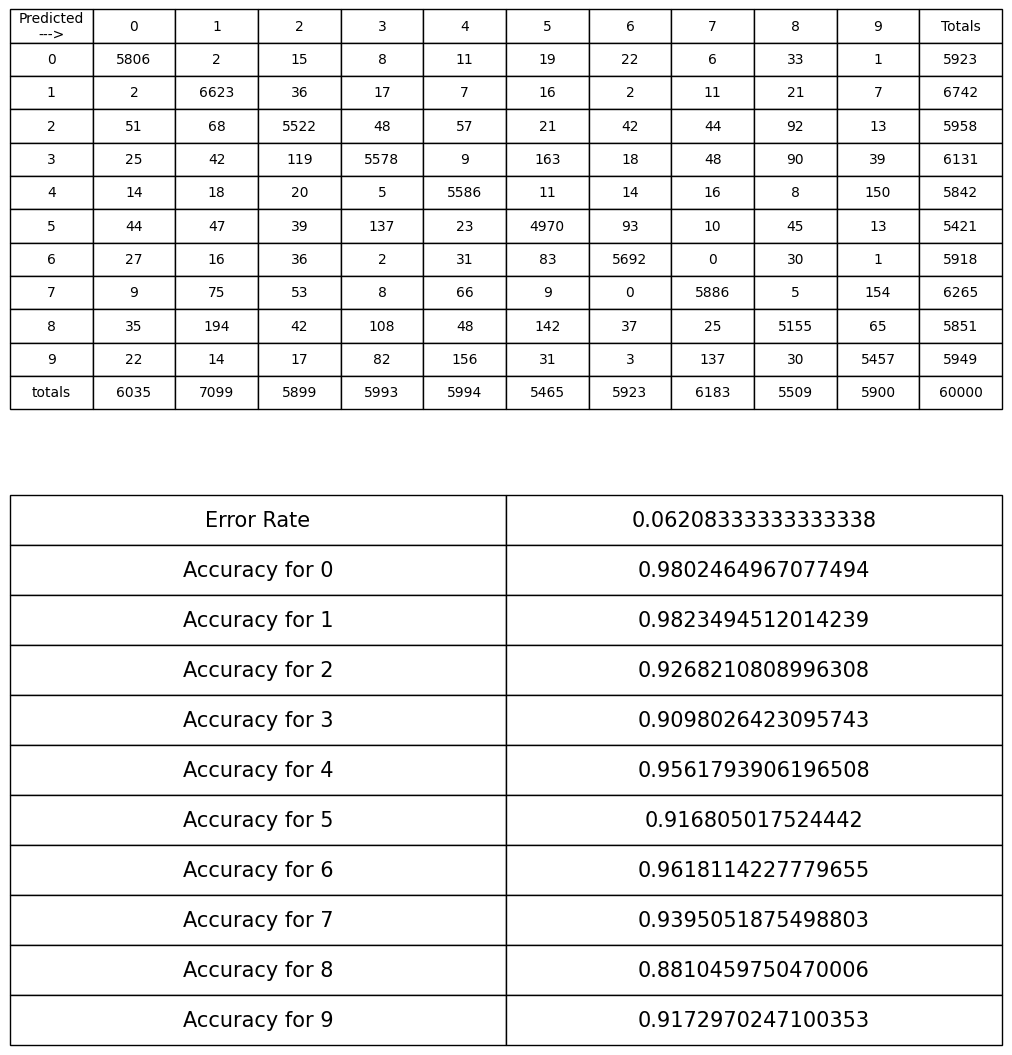

In [42]:
predictions = dot(train_in_feature, prediction_weights)
prediction_results = collapse_results(sign(predictions))
analyze_multi(prediction_results, train_expected[0])

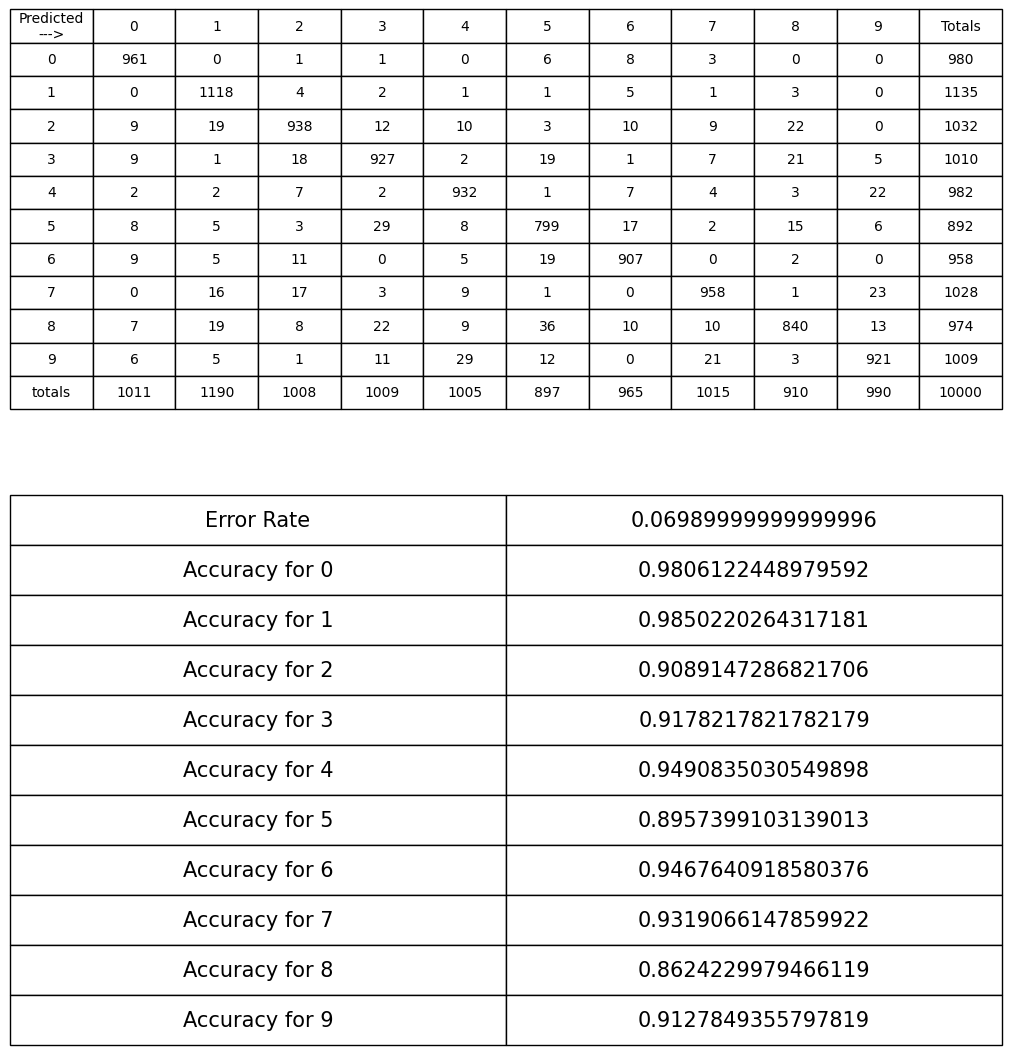

In [43]:
predictions = dot(test_in_feature, prediction_weights)
prediction_results = collapse_results(sign(predictions))
analyze_multi(prediction_results, test_expected[0])

## g(x) = sigmoid

Apply one vectors after applying feature function (sigmoid).

In [44]:
train_in_feature = np.hstack((np.ones((train_in_rand.shape[0], 1)), 1 / (1 + np.power(np.e, train_in_rand * -1))))
test_in_feature = np.hstack((np.ones((test_in_rand.shape[0], 1)), 1 / (1 + np.power(np.e, test_in_rand * -1))))

One versus All Classifier

In [45]:
prediction_weights = make_one_all(train_in_feature, train_expected)

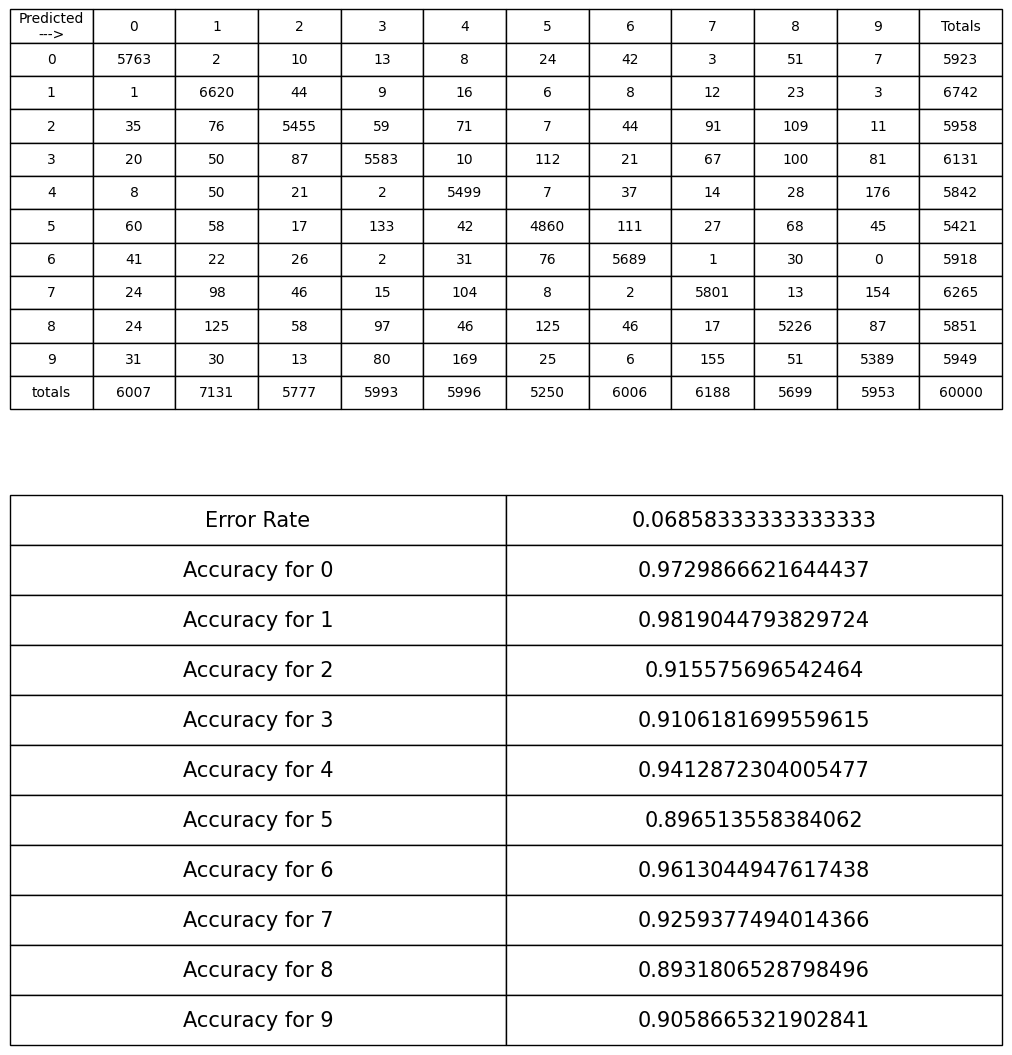

In [47]:
prediction_results = np.argmax(dot(train_in_feature, prediction_weights),axis=1)
analyze_multi(prediction_results, train_expected[0])

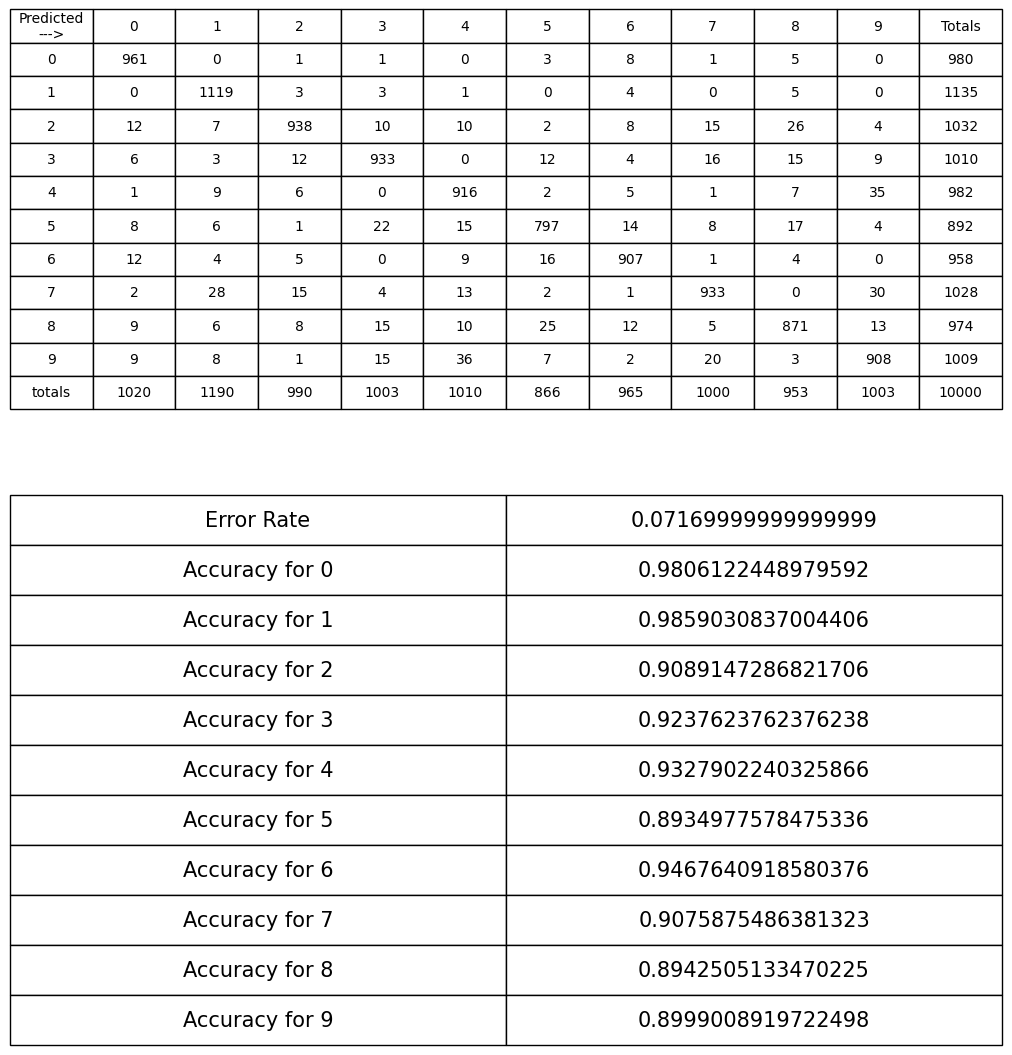

In [48]:
prediction_results = np.argmax(dot(test_in_feature, prediction_weights),axis=1)
analyze_multi(prediction_results, test_expected[0])

One versus One Classifier

In [49]:
prediction_weights = make_one_one(train_in_feature, train_expected[0])

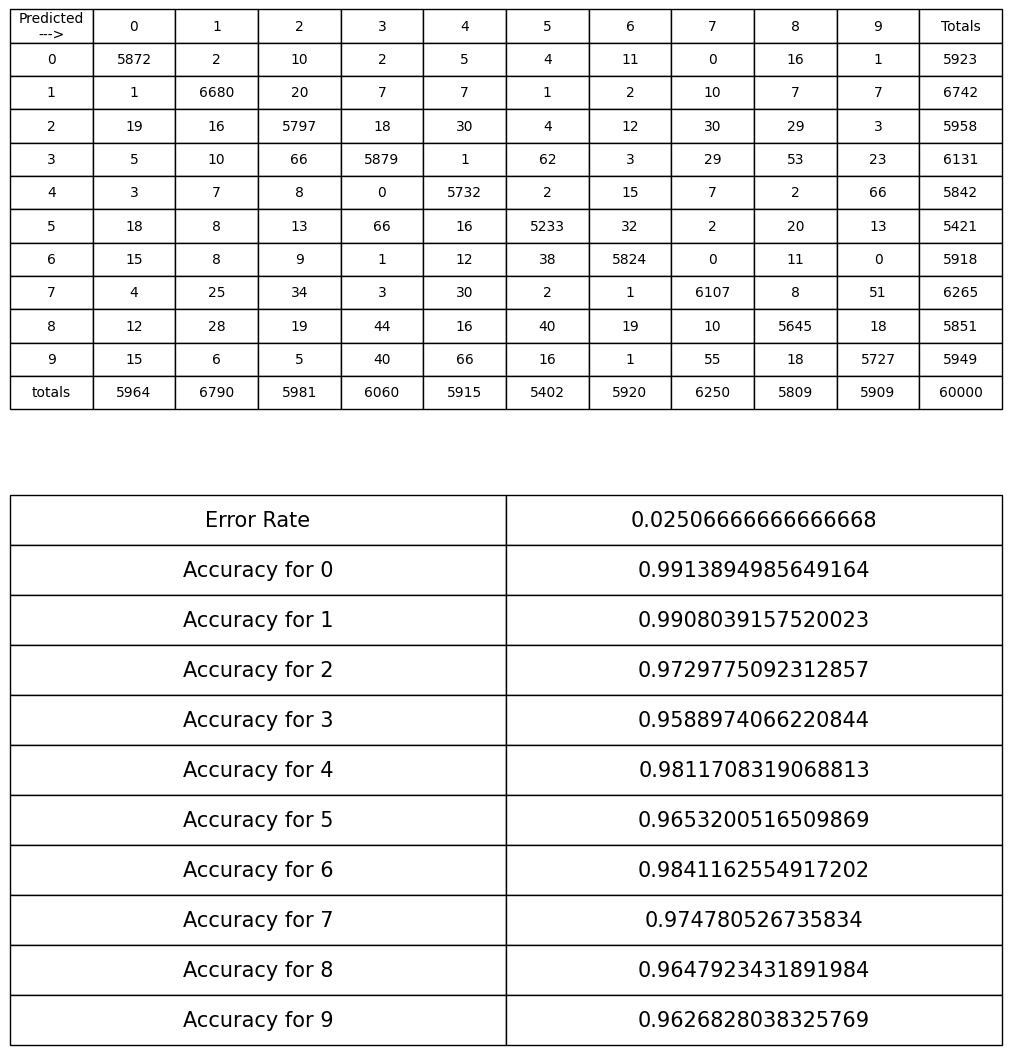

In [50]:
predictions = dot(train_in_feature, prediction_weights) 
prediction_results = collapse_results(sign(predictions))
analyze_multi(prediction_results, train_expected[0])

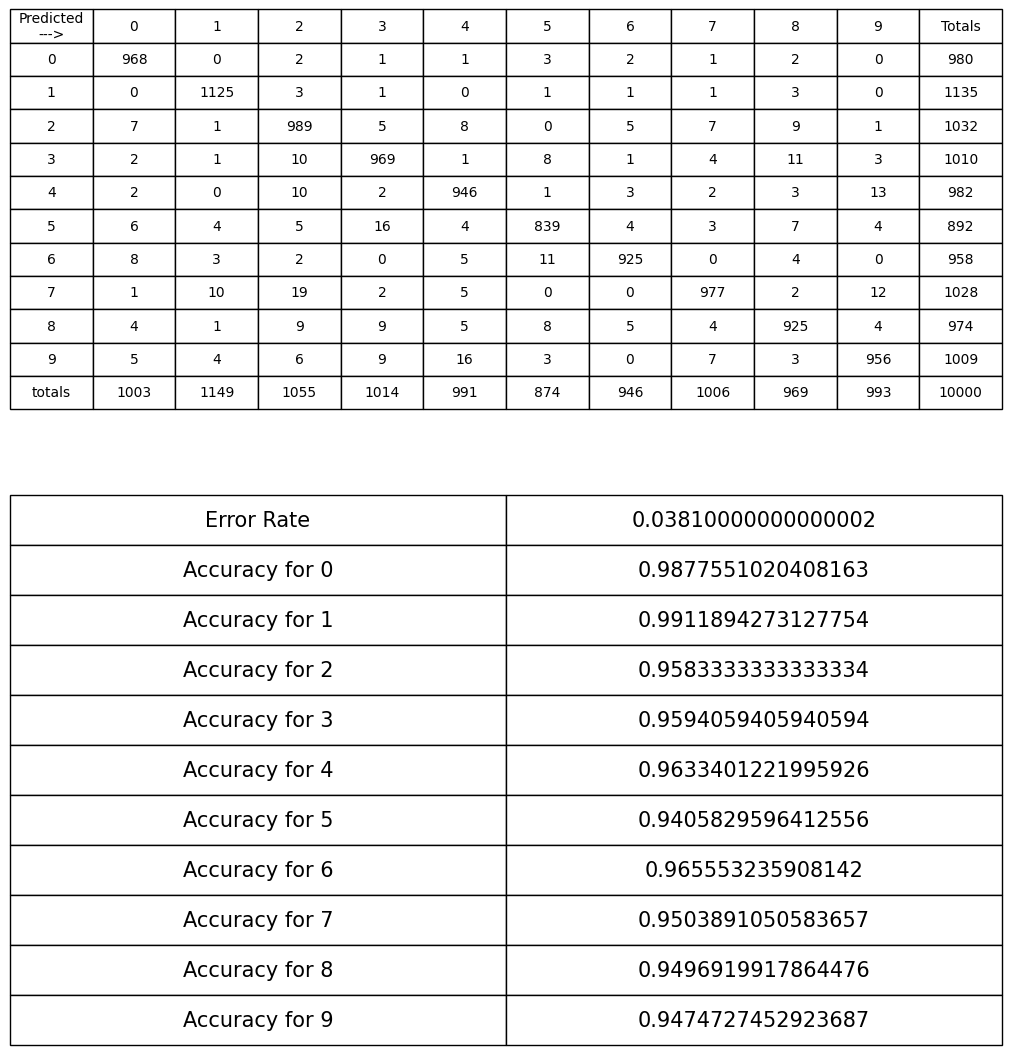

In [51]:
predictions = dot(test_in_feature, prediction_weights) 
prediction_results = collapse_results(sign(predictions))
analyze_multi(prediction_results, test_expected[0])

## g(x) = sin(x)

Apply one vectors after applying feature function (sinusoidal).

In [52]:
train_in_feature = np.hstack((np.ones((train_in_rand.shape[0], 1)), np.sin(train_in_rand)))
test_in_feature = np.hstack((np.ones((test_in_rand.shape[0], 1)), np.sin(test_in_rand)))

One versus All Classifier

In [53]:
prediction_weights = make_one_all(train_in_feature, train_expected)

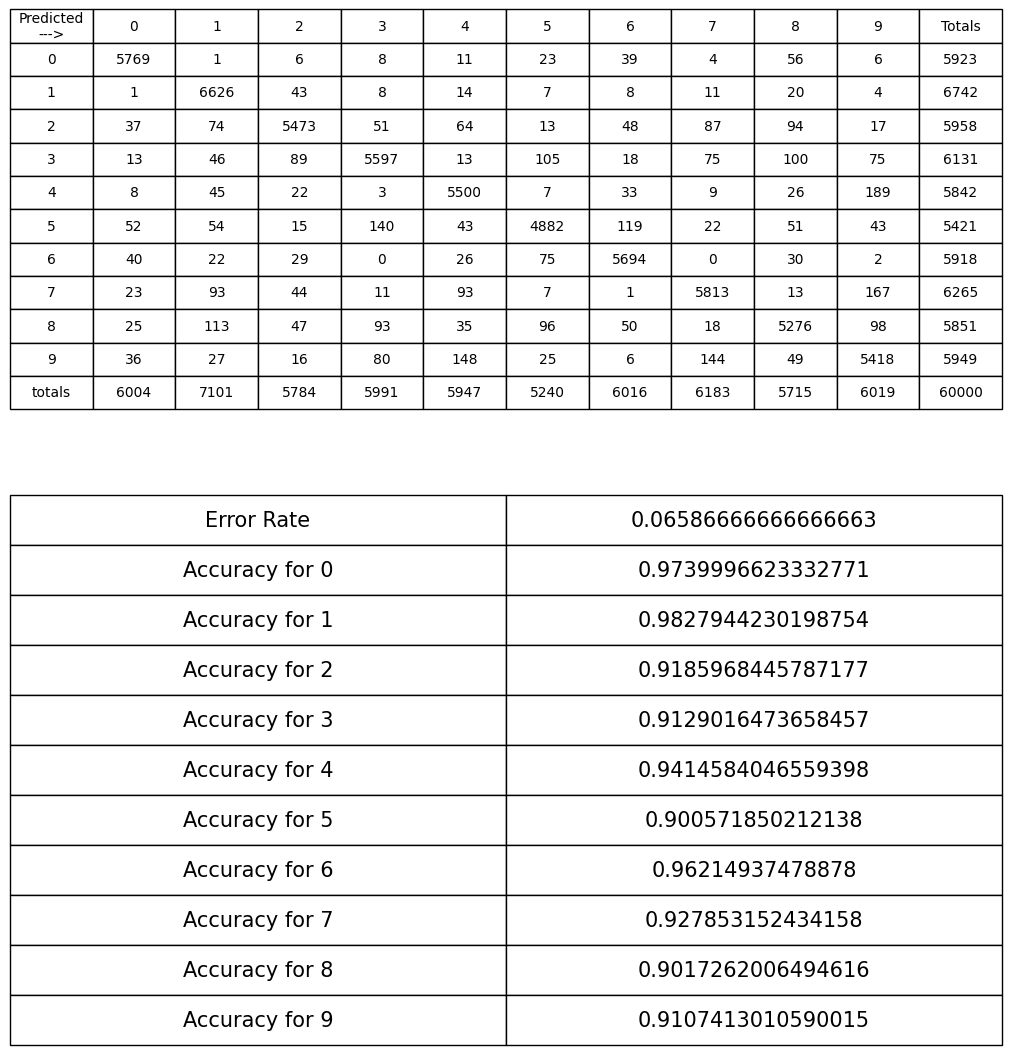

In [54]:
prediction_results = np.argmax(dot(train_in_feature, prediction_weights),axis=1)
analyze_multi(prediction_results, train_expected[0])

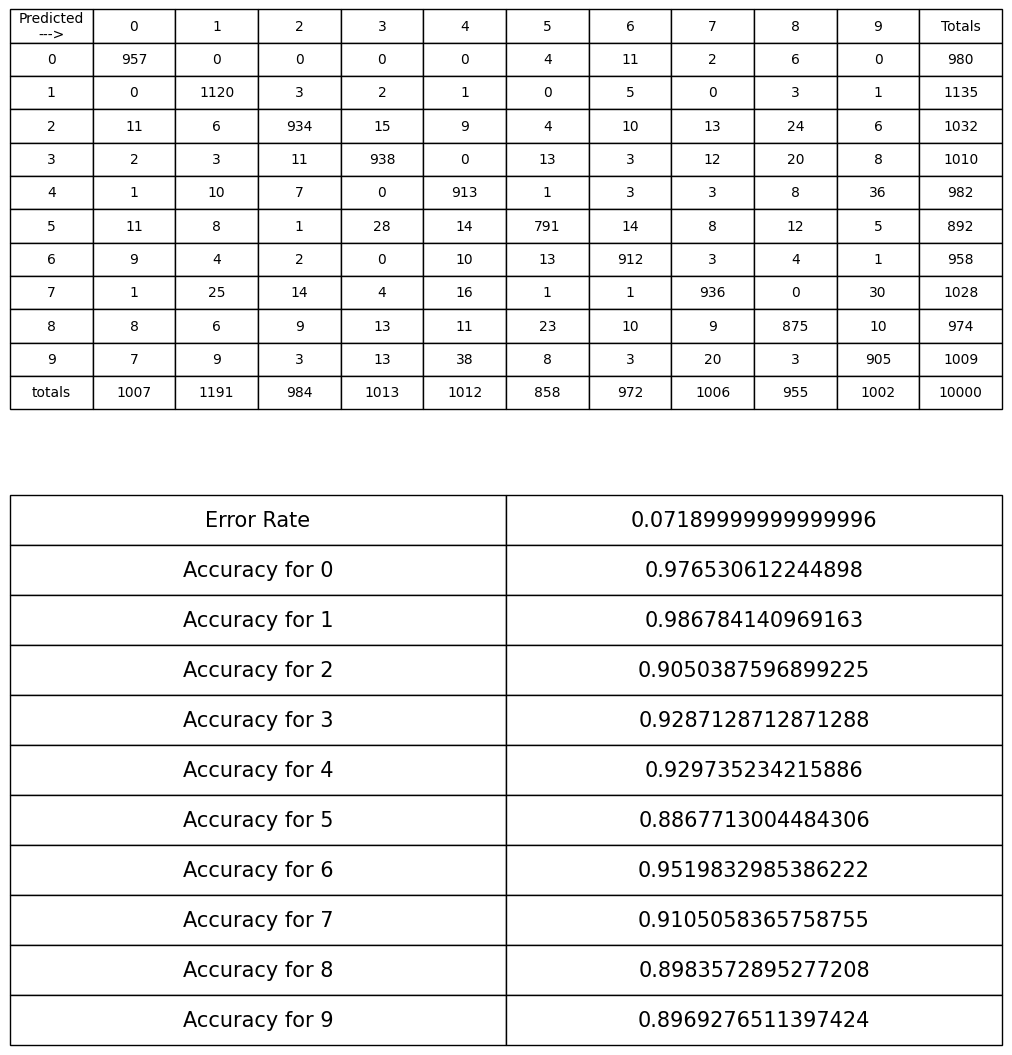

In [55]:
prediction_results = np.argmax(dot(test_in_feature, prediction_weights),axis=1)
analyze_multi(prediction_results, test_expected[0])

One versus One Classifier

In [56]:
prediction_weights = make_one_one(train_in_feature, train_expected[0])

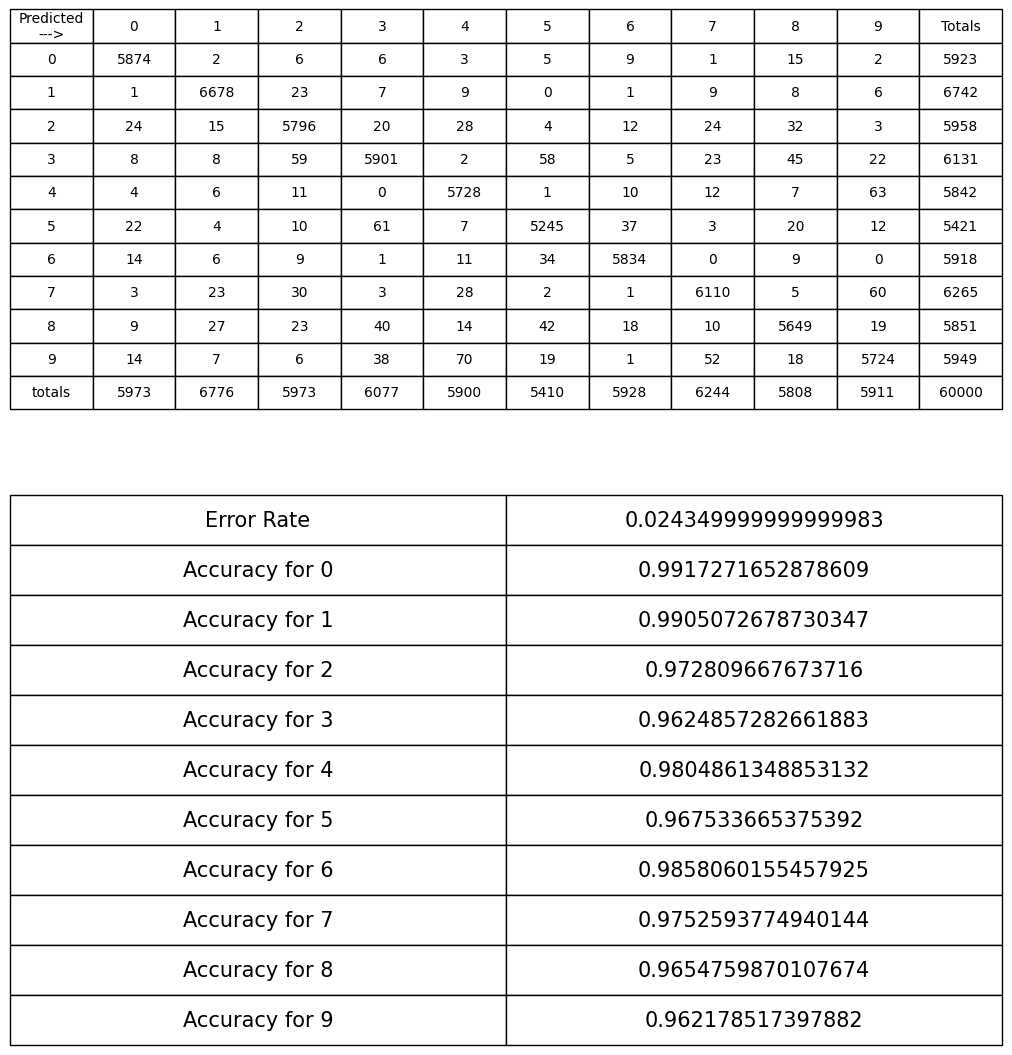

In [57]:
predictions = dot(train_in_feature, prediction_weights)
prediction_results = collapse_results(sign(predictions))
analyze_multi(prediction_results, train_expected[0])

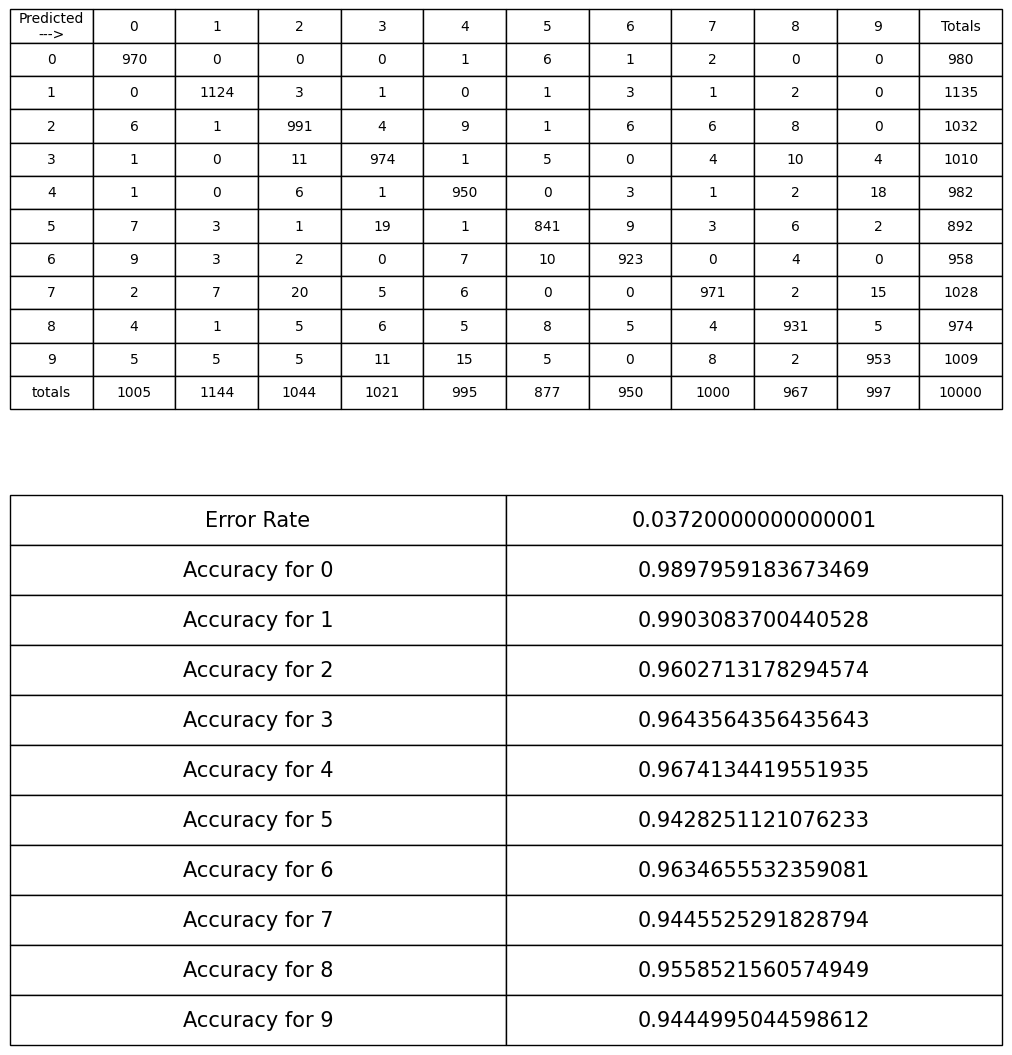

In [58]:
predictions = dot(test_in_feature, prediction_weights)
prediction_results = collapse_results(sign(predictions))
analyze_multi(prediction_results, test_expected[0])

## g(x) = ReLU(x)

Apply one vectors after applying feature function (ReLU).

In [60]:
train_in_feature = np.hstack((np.ones((train_in_rand.shape[0], 1)), np.maximum(0,train_in_rand)))
test_in_feature = np.hstack((np.ones((test_in_rand.shape[0], 1)), np.maximum(0,test_in_rand)))

One versus All Classifier

In [61]:
prediction_weights = make_one_all(train_in_feature, train_expected)

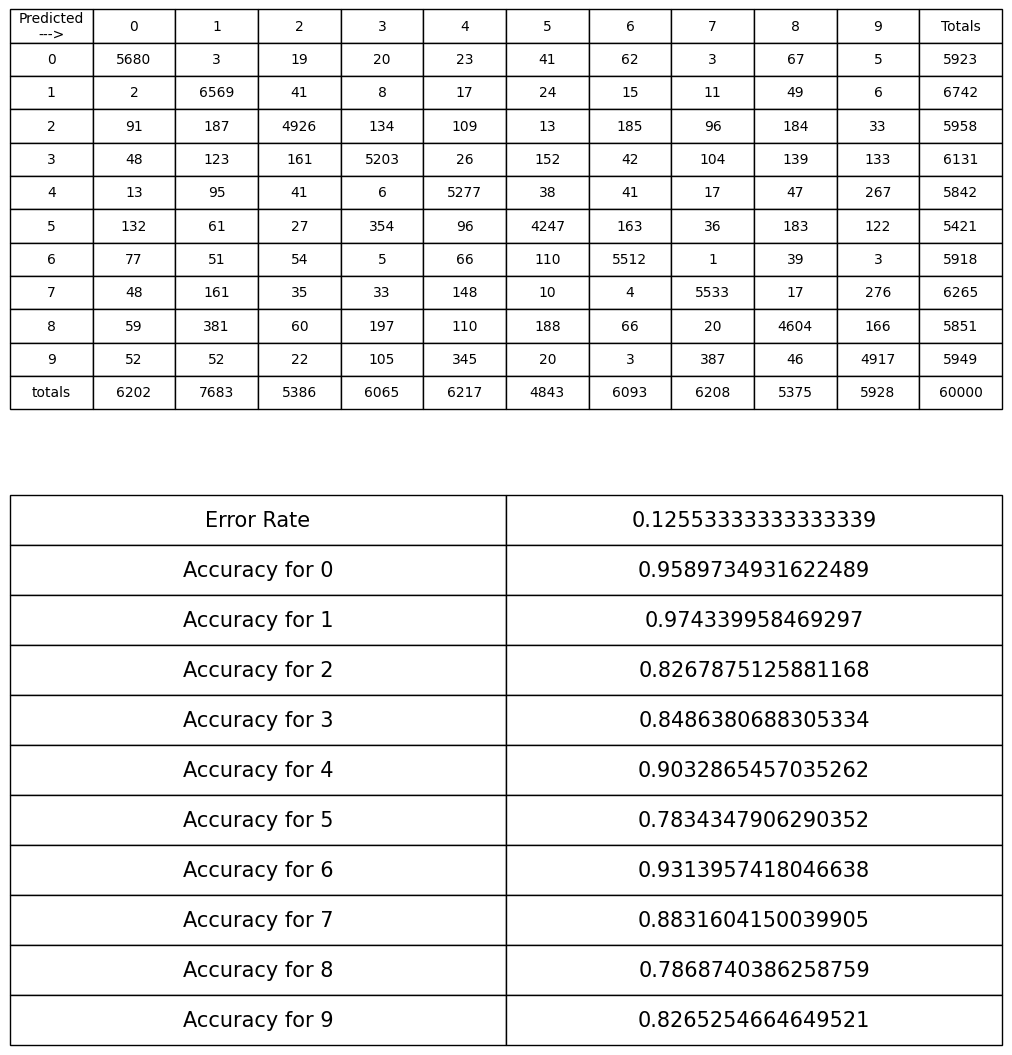

In [64]:
prediction_results = np.argmax(dot(train_in_feature, prediction_weights),axis=1)
analyze_multi(prediction_results, train_expected[0])

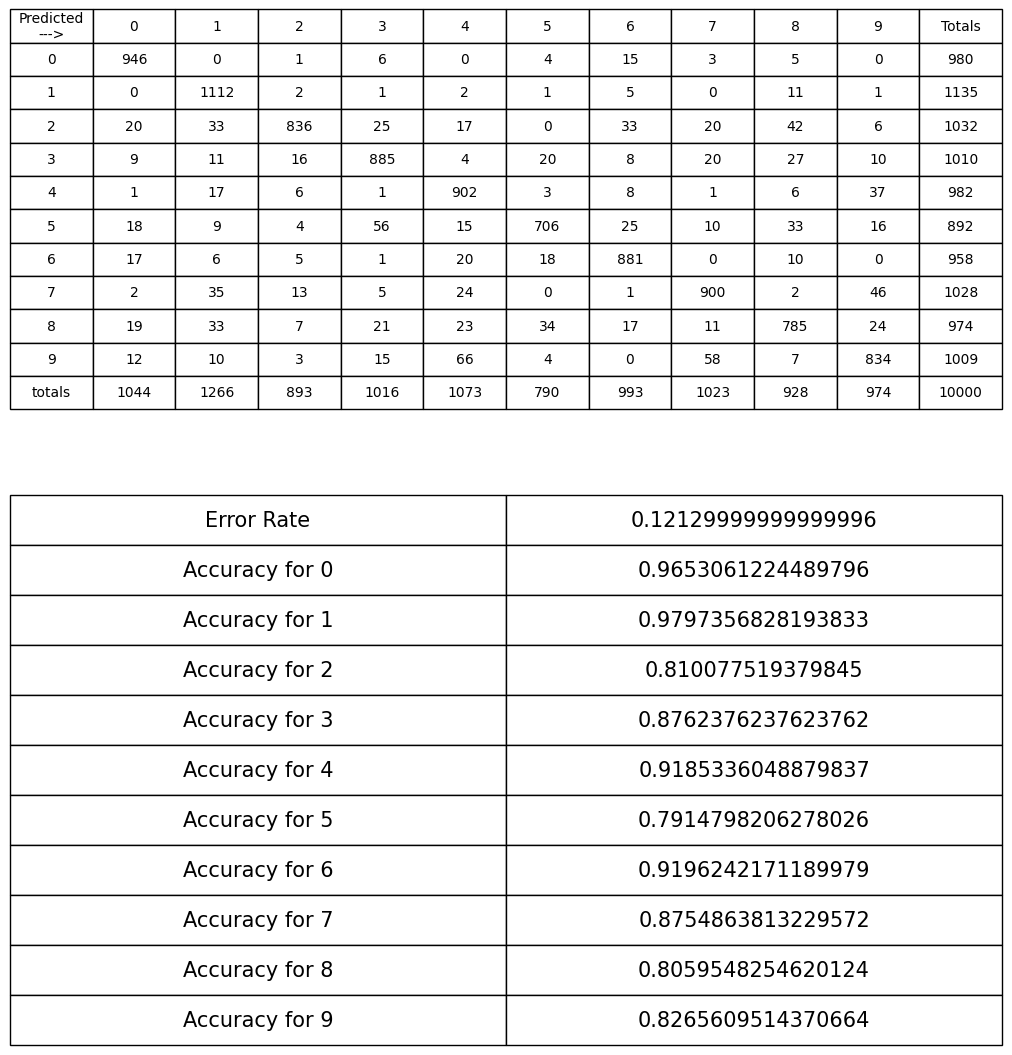

In [65]:
prediction_results = np.argmax(dot(test_in_feature, prediction_weights),axis=1)
analyze_multi(prediction_results, test_expected[0])

One versus One Classifier

In [66]:
prediction_weights = make_one_one(train_in_feature, train_expected[0])

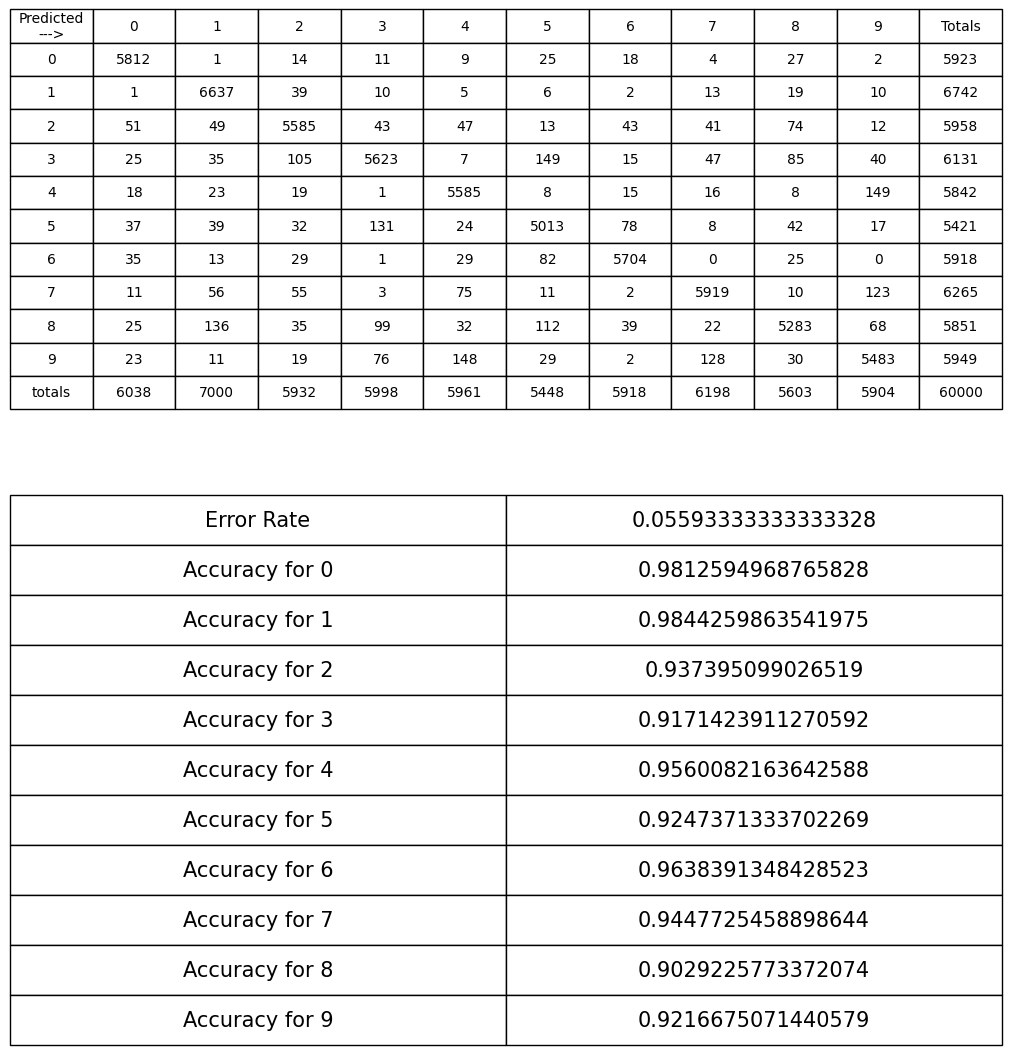

In [69]:
predictions = dot(train_in_feature, prediction_weights)
prediction_results = collapse_results(sign(predictions))
analyze_multi(prediction_results, train_expected[0])

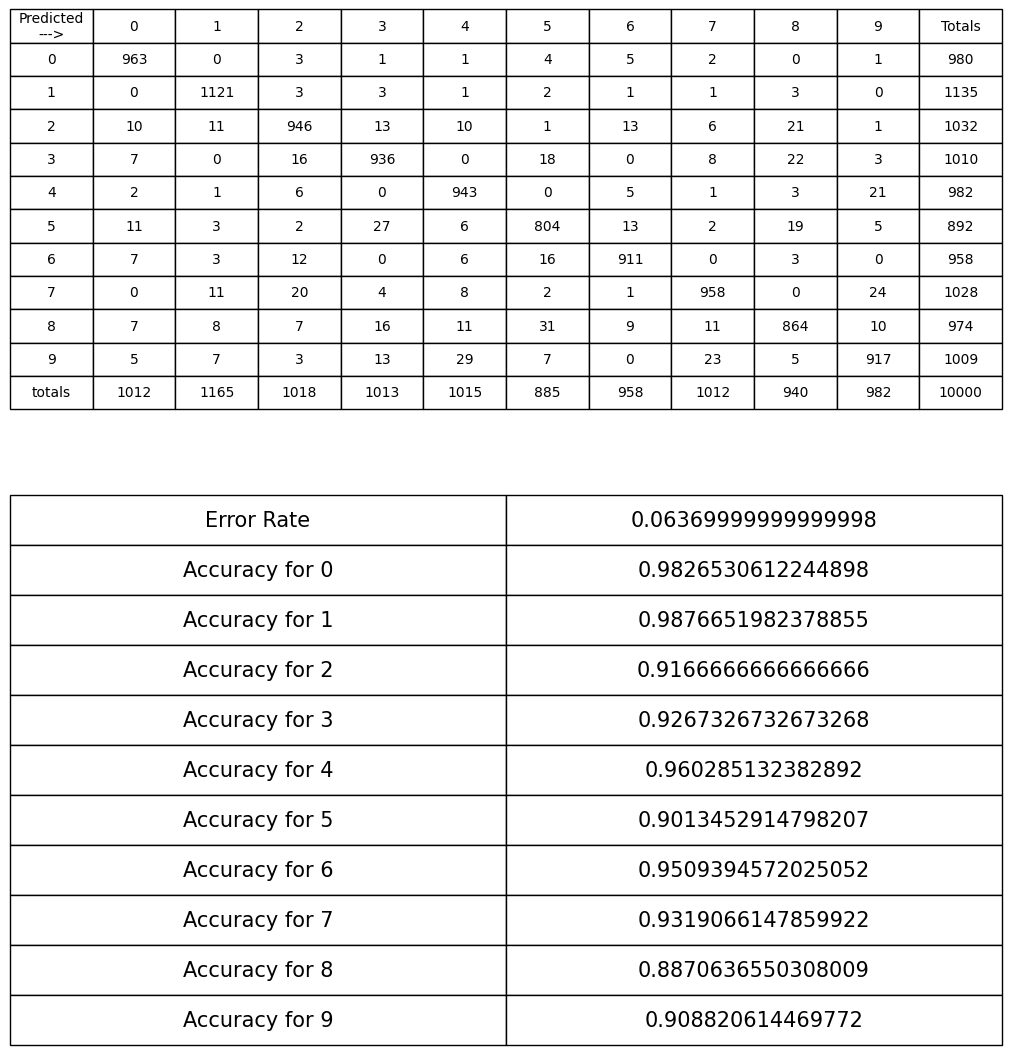

In [70]:
predictions = dot(test_in_feature, prediction_weights)
prediction_results = collapse_results(sign(predictions))
analyze_multi(prediction_results, test_expected[0])

# Feature Space Analysis

Let L hold the values for the feature space's dimensions.
Let error_rate hold the error rates for the respective feature space dimension.

In [98]:
L = []
error_rate = []
for i in range(500, 2000, 250):
    # create random features
    randomizer = np.random.normal(0,1,(train_in.shape[1], i))
    biases = np.random.normal(0,1,(1, i))
    
    # apply features
    train_in_rand = matmul(train_in, randomizer) + biases
    test_in_rand = matmul(test_in, randomizer) + biases
    train_in_feature = np.hstack((np.ones((train_in_rand.shape[0], 1)), np.sin(train_in_rand)))
    test_in_feature = np.hstack((np.ones((test_in_rand.shape[0], 1)), np.sin(test_in_rand)))
    
    # create classifier and evaluate
    prediction_weights = make_one_all(train_in_feature, train_expected)
    prediction_results = np.argmax(dot(test_in_feature, prediction_weights),axis=1)
    L.append(i)
    error_rate.append(analyze_multi(prediction_results, test_expected[0], True))

KeyboardInterrupt: 

Text(0, 0.5, 'Error Rate')

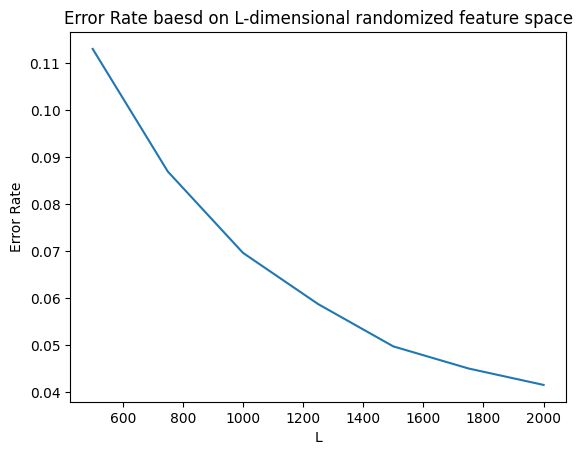

In [95]:
plt.plot(L, error_rate)
plt.title("Error Rate based on L-dimensional randomized feature space")
plt.xlabel("L")
plt.ylabel("Error Rate")

# Robustness of Multi-Class Classifiers

Testing robustness on identity function feature

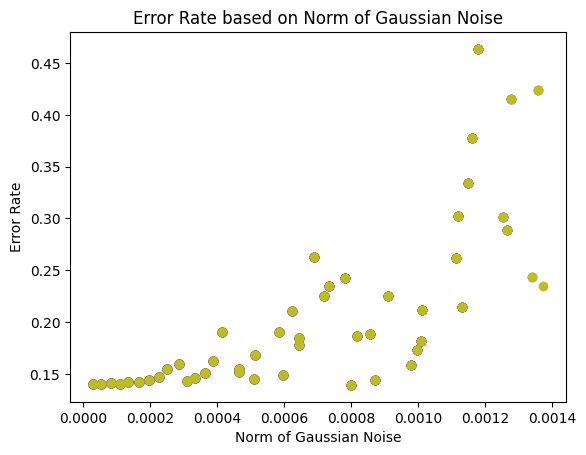

In [118]:
# create random features and create classifier
train_in_feature = np.hstack((np.ones((train_in.shape[0], 1)), train_in))
test_in_feature = test_in
prediction_weights = make_one_all(train_in_feature, train_expected)

# test robustness
norms_vs_errs = []
for i in range(1, 50):
    # create noise with mean 0 and varied variance to control norm
    noise = np.random.normal(0,i/1000000,(1, test_in_feature.shape[1]))
    # apply noise
    test_in_noise = np.hstack((np.ones((test_in_feature.shape[0], 1)), test_in_feature + noise))
    # test classifier on noisy data
    prediction_results = np.argmax(dot(test_in_noise, prediction_weights),axis=1)
    # evaluate error rates
    norms_vs_errs.append((np.linalg.norm(noise), analyze_multi(prediction_results, test_expected[0], True)))

# plot data
plt.scatter(*zip(*norms_vs_errs))
plt.title("Error Rate based on Norm of Gaussian Noise")
plt.xlabel("Norm of Gaussian Noise")
plt.ylabel("Error Rate")

Testing robustness on sinusoidal function feature

Text(0, 0.5, 'Error Rate')

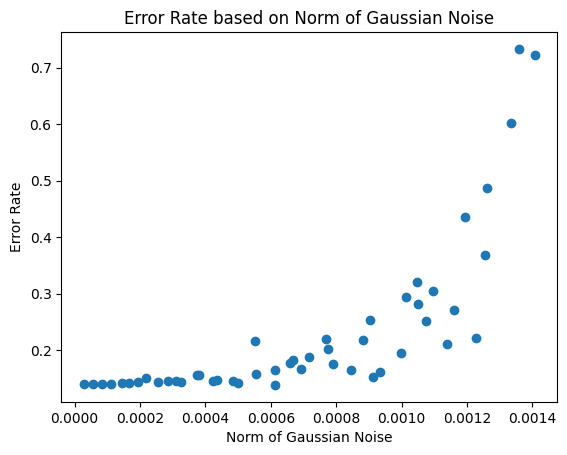

In [127]:
# create random features and create classifier
train_in_feature = np.hstack((np.ones((train_in.shape[0], 1)), np.sin(train_in)))
test_in_feature = np.sin(test_in)
prediction_weights = make_one_all(train_in_feature, train_expected)

# test robustness
norms_vs_errs = []
for i in range(1, 50):
    # create noise with mean 0 and varied variance to control norm
    noise = np.random.normal(0,i/1000000,(1, test_in_feature.shape[1]))
    # apply noise and feature function
    test_in_noise = np.hstack((np.ones((test_in_feature.shape[0], 1)), np.sin(test_in_feature + noise)))
    # test classifier on noisy data
    prediction_results = np.argmax(dot(test_in_noise, prediction_weights),axis=1)
    # evaluate error rates
    norms_vs_errs.append((np.linalg.norm(noise), analyze_multi(prediction_results, test_expected[0], True)))
plt.scatter(*zip(*norms_vs_errs))
plt.title("Error Rate based on Norm of Gaussian Noise")
plt.xlabel("Norm of Gaussian Noise")
plt.ylabel("Error Rate")

# Robustness of Binary Classifier

Make Binary Classifier to identify 4

In [190]:
prediction_weights = make_weights(train_in_aug, train_expected_bin)

In [195]:
dot(test_in_aug, prediction_weights)[4]

array([0.18342572])

VERIFY THAT THIS IS A 4

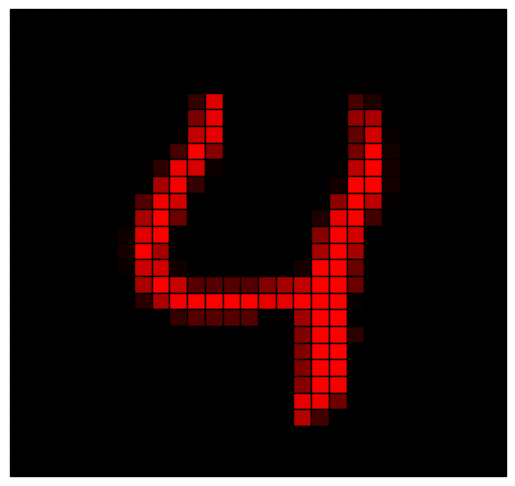

In [196]:
visualize(test_in_pure, 4)

In [193]:
single_input = test_in[4]

Testing robustness of binary classifier.

In [219]:
norms_vs_errs = []
for i in range(0, 1000):
    # make noise vector with varied variance
    noise = np.random.normal(0,i/1000000,(784,))
    # add noise vector to testing input
    test_in_noise = np.insert(single_input + noise, 0, 1)
    # get results
    prediction_result = dot(test_in_noise, prediction_weights)
    # add (norm, err) tuples 
    norms_vs_errs.append((np.linalg.norm(noise), prediction_result))

Text(0, 0.5, 'Confidence Value')

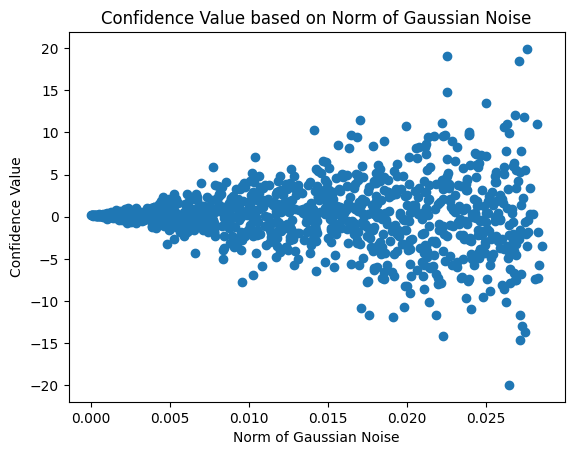

In [223]:
plt.scatter(*zip(*norms_vs_errs))
plt.title("Confidence Value based on Norm of Gaussian Noise")
plt.xlabel("Norm of Gaussian Noise")
plt.ylabel("Confidence Value")

# Varied Randomized Feature Spaces

The following loop will create 10 tuples, the first value being the variance of the Gaussian randomization feature and the second value being the error rate of the classifier. The classifier will have a 1000-dimensional randomized feature space applied along with an additive randomizer and sinusoidal feature function. 

In [222]:
var_vs_errs = []
for i in range(10):
    # create random features
    randomizer = np.random.normal(0, i,(train_in.shape[1], 1000))
    biases = np.random.normal(0,i,(1, 1000))
    # apply features
    train_in_rand = matmul(train_in, randomizer) + biases
    test_in_rand = matmul(test_in, randomizer) + biases
    train_in_feature = np.hstack((np.ones((train_in_rand.shape[0], 1)), np.sin(train_in_rand)))
    test_in_feature = np.hstack((np.ones((test_in_rand.shape[0], 1)), np.sin(test_in_rand)))
    # create model and append values for plotting
    prediction_weights = make_one_all(train_in_feature, train_expected)
    prediction_results = np.argmax(dot(test_in_feature, prediction_weights),axis=1)
    var_vs_errs.append((i, analyze_multi(prediction_results, test_expected[0], True)))

Text(0, 0.5, 'Error Rate')

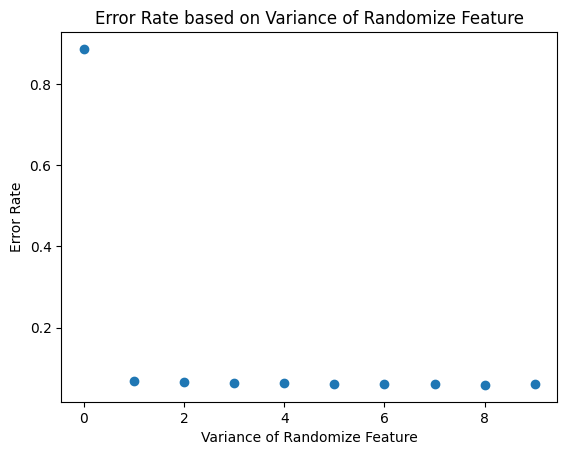

In [225]:
plt.scatter(*zip(*var_vs_errs))
plt.title("Error Rate based on Variance of Randomize Feature")
plt.xlabel("Variance of Randomize Feature")
plt.ylabel("Error Rate")

In [228]:
var_vs_errs = []
for i in range(10):
    # create random features
    randomizer = np.random.poisson(1, (train_in.shape[1], 1000))
    biases = np.random.poisson(1, (1, 1000))
    # apply features
    train_in_rand = matmul(train_in, randomizer) + biases
    test_in_rand = matmul(test_in, randomizer) + biases
    train_in_feature = np.hstack((np.ones((train_in_rand.shape[0], 1)), np.sin(train_in_rand)))
    test_in_feature = np.hstack((np.ones((test_in_rand.shape[0], 1)), np.sin(test_in_rand)))
    # create model and append values for plotting
    prediction_weights = make_one_all(train_in_feature, train_expected)
    prediction_results = np.argmax(dot(test_in_feature, prediction_weights),axis=1)
    var_vs_errs.append((i, analyze_multi(prediction_results, test_expected[0], True)))

Text(0, 0.5, 'Error Rate')

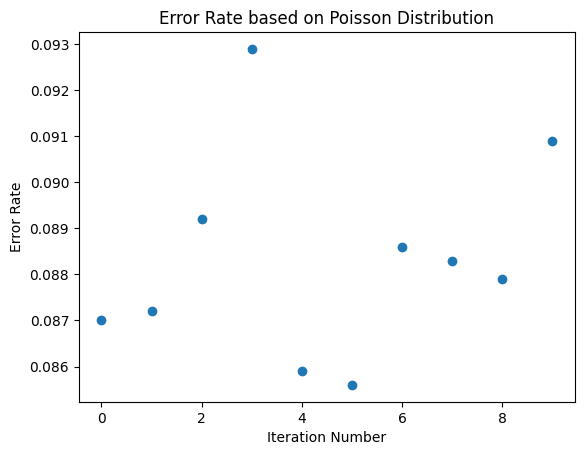

In [230]:
plt.scatter(*zip(*var_vs_errs))
plt.title("Error Rate based on Poisson Distribution")
plt.xlabel("Iteration Number")
plt.ylabel("Error Rate")